In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.shape

(101766, 50)

In [ ]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(df)

In [ ]:
profile.to_file("profile_report.html")

In [ ]:
profile

In [6]:
#check for any missing values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
# checking for missing values represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
print('Missing values in weight:',(98566/df.shape[0]* 100), "%")
print('Missing values in medical specialty:', (49947/df.shape[0]*100), "%")
print('Missing values in diag_1:',(21/df.shape[0]* 100), "%")
print('Missing values in diag_2:', (358/df.shape[0]*100), "%")
print('Missing values in diag_3:', (1423/df.shape[0]*100), "%")

Missing values in weight: 96.85553131694279 %
Missing values in medical specialty: 49.08024291020577 %
Missing values in diag_1: 0.02063557573256294 %
Missing values in diag_2: 0.3517874339170253 %
Missing values in diag_3: 1.398305917497003 %


In [9]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
# will drop weight and medical specialty - many missing values
# not interested in payer code so will drop that - also has many missing values
# dropping id columns
drop_col = ['weight', 'medical_specialty', 'payer_code', 'encounter_id', 'patient_nbr','admission_source_id']
df.drop(drop_col, axis = 1, inplace = True)

In [11]:
# removing rows with missing info ('?') in diag's
df['diag_1'] = df.loc[:,('diag_1')].replace('?', np.NaN)
df['diag_2'] = df.loc[:,('diag_2')].replace('?', np.NaN)
df['diag_3'] = df.loc[:,('diag_3')].replace('?', np.NaN)

df=df.dropna()

In [12]:
# simplifying the target variable 'readmitted' to either yes (1) or no (0)
df['readmitted'] = df.loc[:,('readmitted')].replace('NO', 0)
df['readmitted'] = df.loc[:,('readmitted')].replace(['>30','<30'], 1)

Text(0.5,1,'Total number of patients readmitted (1) vs. not readmitted (0)')

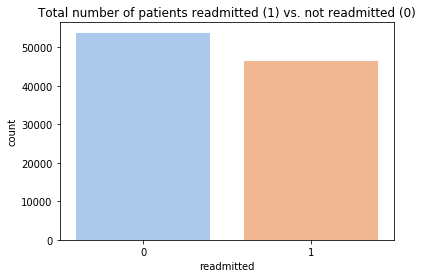

In [13]:
# plotting total count of readmitted patients and not readmitted
ax = sns.countplot(x="readmitted", data=df, palette="pastel")
plt.title('Total number of patients readmitted (1) vs. not readmitted (0)')

In [14]:
df.gender.value_counts()

Female             53922
Male               46319
Unknown/Invalid        3
Name: gender, dtype: int64

In [15]:
# dropping the Unknown/Invalid in gender column
df = df[~df['gender'].str.contains('Unknown/Invalid')]

In [16]:
# gender pie graph 
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

col = "gender"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

# plotting 
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Total Count Males v. Females'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [17]:
df.race.value_counts()

Caucasian          75079
AfricanAmerican    18881
?                   2189
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [18]:
print('Missing values in Race:', 2271/df.shape[0]*100, '%')
print('Caucasians:', 76099/df.shape[0]*100, '%')

Missing values in Race: 2.265540048483156 %
Caucasians: 75.91604233796551 %


In [19]:
# Filling/completing 2.2% missing values in race with the most common occurence -- Caucasian (75% of total dataset)
df['race'] = df.loc[:, ('race')].replace('?','Caucasian')

# Renaming 'Other'
df['race'] = df.loc[:, ('race')].replace('Other','Other_Race')

df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other_Race', 'Asian', 'Hispanic'],
      dtype=object)

Text(0,0.5,'Count')

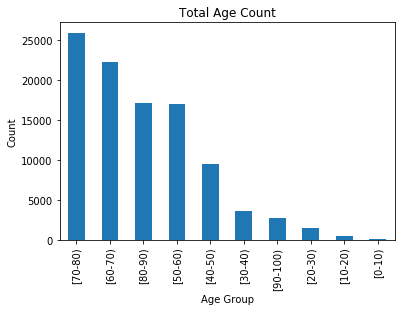

In [20]:
# plotting count of each age group

df.age.value_counts().plot(kind='bar')
plt.title('Total Age Count')
plt.xlabel('Age Group')
plt.ylabel('Count')

#### most patients admitted range from age 50 to 80

Yes    77153
No     23088
Name: diabetesMed, dtype: int64


Text(0,0.5,'Number of Patients')

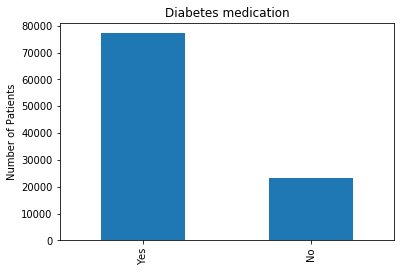

In [21]:
# counting how many people have been prescribed with diabetes medication
print(df.diabetesMed.value_counts())

df.diabetesMed.value_counts().plot(kind='bar')
plt.title('Diabetes medication')
plt.ylabel('Number of Patients')

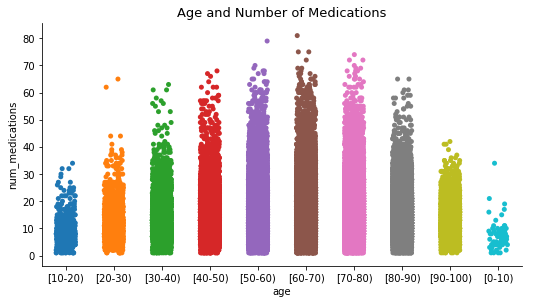

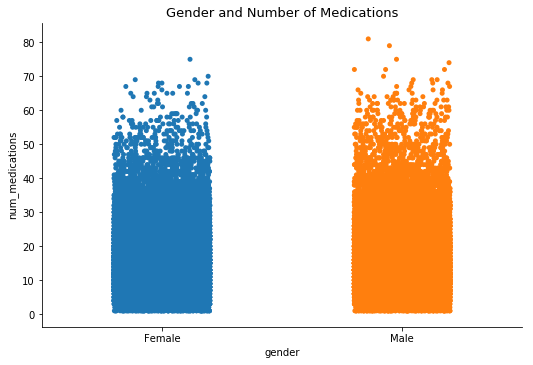

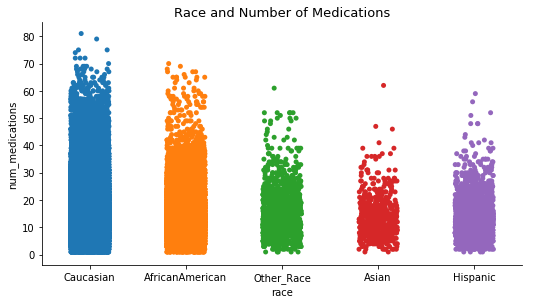

In [22]:
# Number of Medications and demographics (age, gender, race)
sns.catplot(x = "age", y = "num_medications", data=df, jitter = "0.2")
plt.gcf().set_size_inches(8, 4)
plt.title("Age and Number of Medications", fontsize = 13)
plt.show()

sns.catplot(x = "gender", y = "num_medications", data=df, jitter = "0.2")
plt.gcf().set_size_inches(8, 5)
plt.title("Gender and Number of Medications", fontsize = 13)
plt.show()

sns.catplot(x = "race", y = "num_medications", data=df, jitter = "0.2")
plt.gcf().set_size_inches(8, 4)
plt.title("Race and Number of Medications", fontsize = 13)
plt.show()

Text(0.5,1,'Number of Medications and Readmission')

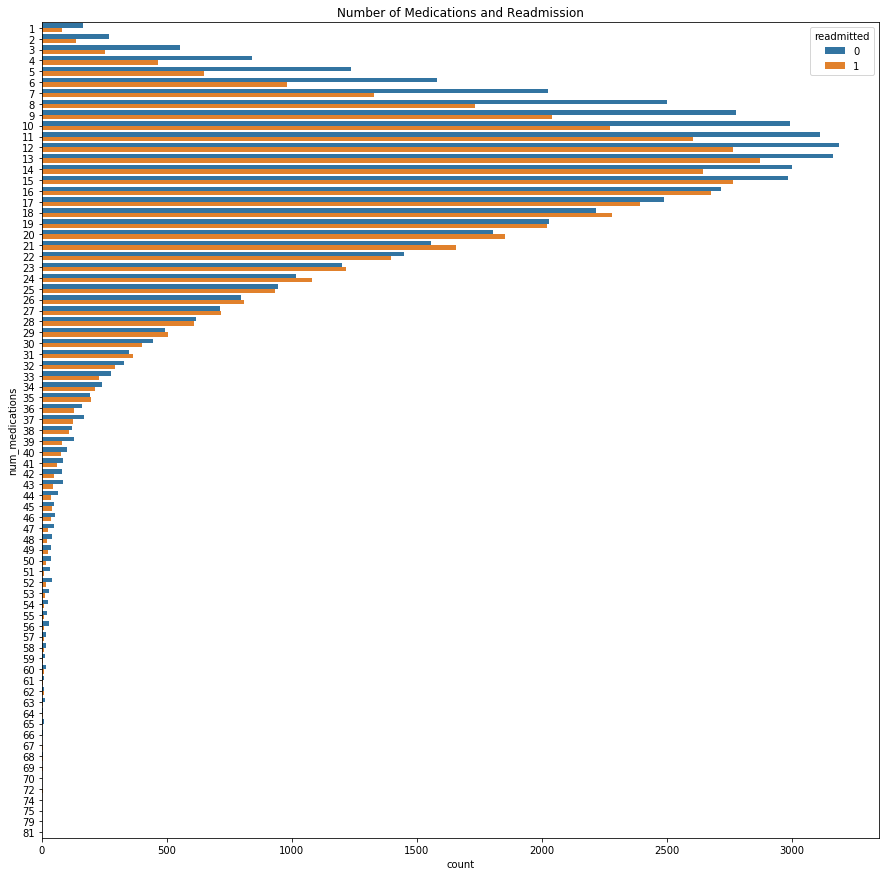

In [23]:
fig = plt.figure(figsize=(15,15))
sns.countplot(y = df['num_medications'], hue = df['readmitted'])
plt.title('Number of Medications and Readmission')

In [24]:
# profile reports shows insignificant drugs which less than 0.1% are taking - will drop these
drop_meds = ['examide', 'citoglipton','glimepiride-pioglitazone','glipizide-metformin','metformin-pioglitazone', 
         'metformin-rosiglitazone', 'troglitazone', 'tolbutamide', 'acetohexamide']

df.drop(drop_meds, axis=1,inplace=True)

In [25]:
meds = ['metformin', 'glimepiride','glipizide','glyburide', 'pioglitazone','rosiglitazone','insulin', 
        'miglitol','tolazamide','glyburide-metformin','chlorpropamide','acarbose','nateglinide','repaglinide']

# medication intake - yes or no
df[meds] = df[meds].replace(['Steady','Up','Down'],1)
df[meds] = df[meds].replace('No', 0)

Text(0,0.5,'Count')

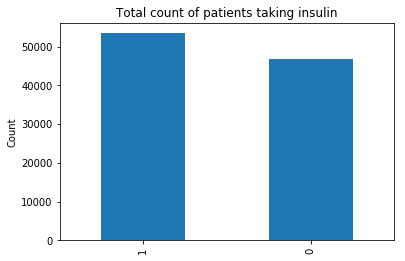

In [26]:
df.insulin.value_counts().plot(kind='bar')
plt.title('Total count of patients taking insulin')
plt.ylabel('Count')

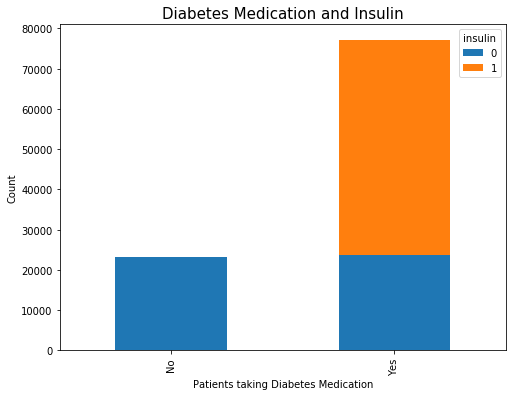

In [27]:
# stacked bar plot of diabetes medication takers and insulin takers

df.groupby(['diabetesMed', 'insulin']).size().unstack().plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Diabetes Medication and Insulin', fontsize=15)
plt.xlabel('Patients taking Diabetes Medication')
plt.ylabel('Count')
plt.show()

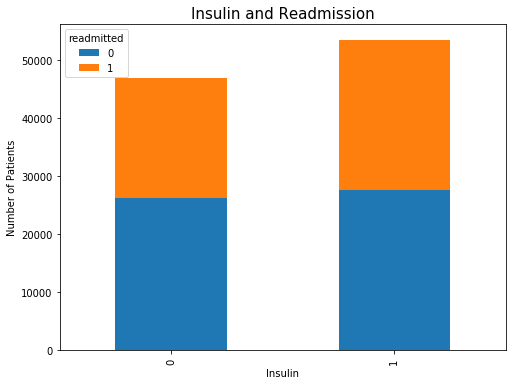

In [28]:
# plotting how many patients taking insulin are readmitted back into the hospital
    # Readmitted(0) = No
    # Readmitted(1) = Yes

df.groupby(['insulin', 'readmitted']).size().unstack().plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Insulin and Readmission', fontsize=15)
plt.xlabel('Insulin')
plt.ylabel('Number of Patients')
plt.show()

In [29]:
# 'change' is Change in Diabetic Medications -- how many patients had a change?
print(df.change.value_counts())

# mapping change 'No' and 'Ch' into numerical values 
    # readmitted '0' = Not readmitted
    # readmitted '1' = Readmitted

df['change']=df.loc[:,('change')].replace('No', 0)
df['change']=df.loc[:,('change')].replace('Ch', 1)

No    53891
Ch    46350
Name: change, dtype: int64


In [30]:
# Max Glucose Serum Test values: 
    #  >200 = Diabetic 
    #  >300 = Dangerous
    #  Norm = normal
    #  None = not measured

# combining '>200' and '>300' values together as 'Diabetic'
df['max_glu_serum']=df.loc[:,('max_glu_serum')].replace(['>200', '>300'], 'Diabetic')

df.max_glu_serum.value_counts()

None        94978
Diabetic     2705
Norm         2558
Name: max_glu_serum, dtype: int64

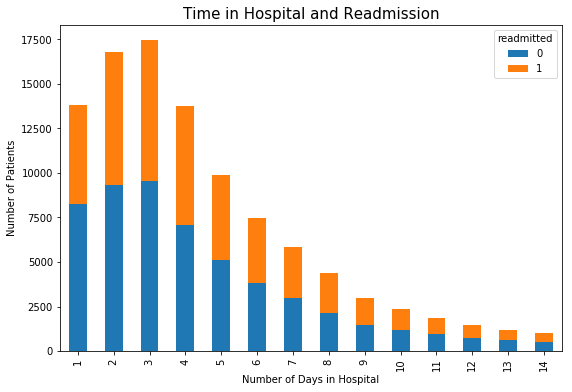

In [31]:
# plotting how many patients were readmitted based on how many days they stayed in the hospital

df.groupby(['time_in_hospital', 'readmitted']).size().unstack().plot(kind='bar',stacked=True, figsize=(9,6))
plt.title('Time in Hospital and Readmission', fontsize=15)
plt.xlabel('Number of Days in Hospital')
plt.ylabel('Number of Patients')
plt.show()

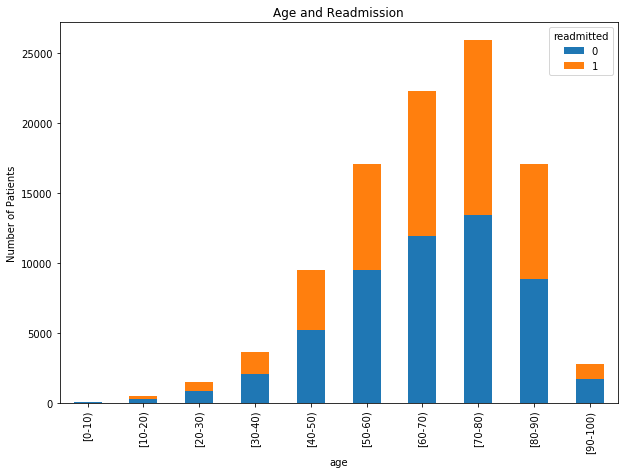

In [32]:
# plotting how many patients being readmitted based on age

df.groupby(['age', 'readmitted']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,7))
plt.title('Age and Readmission')
plt.ylabel('Number of Patients')
plt.show()

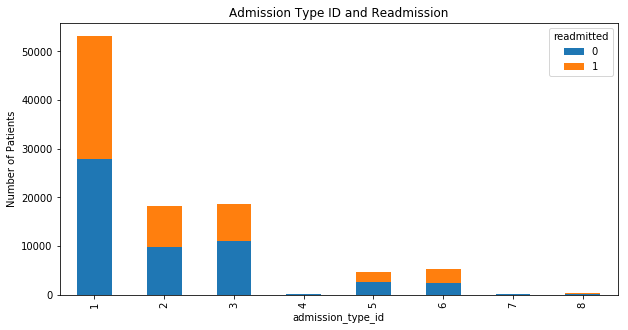

In [33]:
# plotting how many patients are readmitted by admission type ID

# Admission type ID 1 = Emergency - immediate care for severe, life threatening conditions
# Admission type ID 2 = Urgent - immediate care for physical and mental disorders
# Admission type ID 3 = Elective - does not need immediate attention
# Admission type ID 5 = Trauma Centre
# Admission type ID 6 = Reserved

df.groupby(['admission_type_id', 'readmitted']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,5))
plt.title('Admission Type ID and Readmission')
plt.ylabel('Number of Patients')
plt.show()

#### most patients were readmitted based on Emergency situations (type ID 1)

Text(0.5,1,'Number of Diagnoses and Number of Medications')

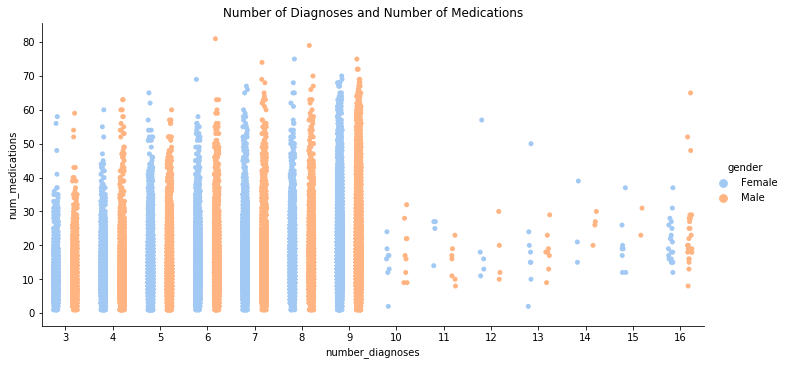

In [34]:
# plotting number of diagnoses by number of medications separated by each gender

ax = sns.catplot(x="number_diagnoses", y="num_medications", hue="gender", palette = "pastel", dodge=True, data=df, aspect=2)
plt.title('Number of Diagnoses and Number of Medications')

In [35]:
df.shape

(100241, 35)

In [36]:
# mapping '>8' and '>7' values in A1C blood test as 'Diabetic'
df['A1Cresult'] = df['A1Cresult'].replace(['>7', '>8'], 'Diabetic')

print(df.A1Cresult.value_counts())

# 'None' means test was not done. 
print('Number of patients who did not take the test:', int(84745/df.shape[0]*100), "%")

None        83642
Diabetic    11664
Norm         4935
Name: A1Cresult, dtype: int64
Number of patients who did not take the test: 84 %


In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,readmitted
admission_type_id,1,0.0813662,-0.0122842,-0.142531,0.130525,0.0799725,0.0259013,-0.0194295,-0.0370928,-0.121075,0.0146038,-0.00314495,-0.00870879,0.00813344,-0.00150293,0.0128263,0.00221612,0.0150411,0.0224293,0.00552277,-0.000302751,0.00616697,-0.0307997,-0.0033966,0.00708769,-0.0048991
discharge_disposition_id,0.0813662,1,0.162717,0.0228862,0.0146158,0.107709,-0.00920574,-0.0249965,0.0202455,0.0423801,-0.0110831,-0.00441492,-0.0120848,0.0157831,-0.0217368,-0.0141962,0.0448981,-0.0130669,-0.00554237,0.00592046,0.00836159,0.00895167,-0.0458642,-0.00486664,-0.0124401,-0.0162319
time_in_hospital,-0.0122842,0.162717,1,0.319328,0.189262,0.46384,-0.0103663,-0.0104213,0.0724122,0.210353,-0.00751197,0.0331197,0.00507852,0.00238516,0.013603,0.0147329,0.0243074,0.00467934,0.00483956,0.00598305,0.00181411,-0.0030473,0.101923,-0.00197399,0.109498,0.0489525
num_lab_procedures,-0.142531,0.0228862,0.319328,1,0.0582826,0.268948,-0.00771251,-0.0022397,0.0386653,0.151184,-0.0477991,0.0123202,-0.00669835,-0.00125387,-0.00055658,0.0132207,-0.00125147,-0.0139533,-0.0102074,0.000394917,-0.00467982,0.000225827,0.0936117,-0.010556,0.0639225,0.0377943
num_procedures,0.130525,0.0146158,0.189262,0.0582826,1,0.383102,-0.0263985,-0.0385635,-0.0679885,0.0601423,-0.0404939,0.00323522,-0.00459041,0.00737129,0.00959082,0.00309424,0.00532143,0.0127885,0.0137603,-0.00220439,1.25278e-05,0.0021374,0.0196663,-0.00206694,0.00516403,-0.0468328
num_medications,0.0799725,0.107709,0.46384,0.268948,0.383102,1,0.0432291,0.0122596,0.061969,0.244153,0.0686051,0.0233809,0.0226262,0.00187339,0.04304,0.0558337,0.036723,0.0663694,0.0517392,0.0186134,0.00432814,-0.00335032,0.214483,0.00807462,0.247926,0.0431823
number_outpatient,0.0259013,-0.00920574,-0.0103663,-0.00771251,-0.0263985,0.0432291,1,0.0915314,0.107052,0.0929653,-0.0116387,0.00292526,0.00112472,-0.00522143,-0.0134197,0.00740547,-0.00424819,0.0123405,-0.00299837,0.0124203,0.000495193,-0.00521152,0.00563428,-0.00744871,0.0245817,0.0812308
number_emergency,-0.0194295,-0.0249965,-0.0104213,-0.0022397,-0.0385635,0.0122596,0.0915314,1,0.267318,0.0559765,-0.00921587,0.0107022,0.00258092,-0.00506598,-0.000434332,-0.00600022,-0.02948,0.00116781,-0.00916718,0.000834061,-0.000758674,-0.00298393,0.0429873,0.00189064,0.038352,0.102178
number_inpatient,-0.0370928,0.0202455,0.0724122,0.0386653,-0.0679885,0.061969,0.107052,0.267318,1,0.102597,-0.0712707,0.0127248,-0.00782478,-0.00784028,-0.0127501,-0.0244258,-0.0390843,-0.0261919,-0.0216131,0.0024321,0.000961928,-0.00479587,0.0700917,-0.0113719,0.0232079,0.215625
number_diagnoses,-0.121075,0.0423801,0.210353,0.151184,0.0601423,0.244153,0.0929653,0.0559765,0.102597,1,-0.0750612,0.0384929,0.0150039,-0.012136,0.00929807,-0.0109502,-0.0310562,0.000949943,-0.0128566,0.00732583,0.000736619,-0.0105566,0.0935881,-0.00865669,0.0543712,0.107187


### Converting categorical data into numerical datatype

In [38]:
# changing age variables into ordinal
for i in range(0,10):
    df['age'] = df['age'].replace('[' + str(i*10) + '-' + str(10*(i+1)) + ')', i+1)


In [39]:
# changing gender into dummy variables
df['gender']=df['gender'].replace(0, 'Male')
df['gender']=df['gender'].replace(1, 'Female')

gender_d=pd.get_dummies(df['gender'])
df=pd.concat([df,gender_d],axis=1)
df.drop(['gender'],axis=1,inplace=True)

# changing race into dummy variables
race_d=pd.get_dummies(df['race'])
df=pd.concat([df,race_d],axis=1)
df.drop(['race'],axis=1,inplace=True)

# changing diabetesMed into dummy variables
diabetes_med=pd.get_dummies(df['diabetesMed'], prefix='diabMed')
df=pd.concat([df,diabetes_med],axis=1)
df.drop(['diabetesMed'],axis=1,inplace=True)

# changing max glucose serum test values into dummy variables
glucose_d=pd.get_dummies(df['max_glu_serum'],prefix='Glucose')
df=pd.concat([df,glucose_d],axis=1)
df.drop(['max_glu_serum'],axis=1,inplace=True)

# changing A1C blood test values into dummy variables
a1c_d=pd.get_dummies(df['A1Cresult'],prefix='A1C')
df=pd.concat([df,a1c_d],axis=1)
df.drop(['A1Cresult'],axis=1,inplace=True)

In [40]:
def map_diag(diag_code):
    """ 
    Mapping diagnosis ID code to disease/disorder
    :param diag_code: number
    :return: category for a diagnosis
    """
    
    if "V" in str(diag_code) or "E" in str(diag_code):
        diag_category='external injury and supplemental'
    elif float(diag_code) is 0:
        diag_category='N/A'
    elif float(diag_code) < 140:
        diag_category='infectious and parasitic'
    elif float(diag_code) >= 140 and float(diag_code) < 240:
        diag_category='neoplasms'
    elif float(diag_code) >= 240 and float(diag_code) < 249:
        diag_category='thyroid'
    elif float(diag_code) >= 249 and float(diag_code) < 260:
        diag_category='diabetes'
    elif float(diag_code) >= 260 and float(diag_code) < 280:
        diag_category='nutritional, metabolic, immunity'
    elif float(diag_code) >= 280 and float(diag_code) < 290:
        diag_category='blood'
    elif float(diag_code) >= 290 and float(diag_code) < 320:
        diag_category='mental'
    elif float(diag_code) >= 320 and float(diag_code) <390:
        diag_category='nervous'
    elif float(diag_code) >= 390 and float(diag_code) < 460:
        diag_category='circulatory'
    elif float(diag_code) >= 460 and float(diag_code) < 520:
        diag_category='respiratory'
    elif float(diag_code) >= 520 and float(diag_code) < 580:
        diag_category='digestive'
    elif float(diag_code) >= 580 and float(diag_code) < 630:
        diag_category='genitourinary'
    elif float(diag_code) >= 630 and float(diag_code) < 680:
        diag_category='pregnancy'
    elif float(diag_code) >= 680 and float(diag_code) < 710:
        diag_category='skin'
    elif float(diag_code) >= 710 and float(diag_code) < 740:
        diag_category='musculoskeletal'
    elif float(diag_code) >= 740 and float(diag_code) < 760:
        diag_category='congenital'
    elif float(diag_code) >= 760 and float(diag_code) < 780:
        diag_category='perinatal'
    elif float(diag_code) >= 780 and float(diag_code) < 800:
        diag_category='symptoms'
    else: 
        diag_category='injury and poisoning'
    return diag_category

#testing to make sure the function works correctly
print(map_diag("777.3"))
print(map_diag("250"))
print(map_diag("E909"))

perinatal
diabetes
external injury and supplemental


In [41]:
diag=['diag_1','diag_2','diag_3']

#fill in missing columns
df[diag] = df[diag].replace('?', 0)

df.diag_1.head()

1    276
2    648
3      8
4    197
5    414
Name: diag_1, dtype: object

In [42]:
for col in diag:
    df[col] = df[col].apply(map_diag)
    
df.diag_1.head()

1    nutritional, metabolic, immunity
2                           pregnancy
3            infectious and parasitic
4                           neoplasms
5                         circulatory
Name: diag_1, dtype: object

In [43]:
# changing diagnosis values into dummy variables

diag_1_d=pd.get_dummies(df['diag_1'], prefix='diag1')
df=pd.concat([df,diag_1_d],axis=1)
df.drop(['diag_1'],axis=1,inplace=True)

diag_2_d=pd.get_dummies(df['diag_2'],prefix='diag2')
df=pd.concat([df,diag_2_d],axis=1)
df.drop(['diag_2'],axis=1,inplace=True)

diag_3_d=pd.get_dummies(df['diag_3'],prefix='diag3')
df=pd.concat([df,diag_3_d],axis=1)
df.drop(['diag_3'],axis=1,inplace=True)

In [44]:
# changing discharge disposition id and admission source id into dummy variables

admission_type_id_d=pd.get_dummies(df['admission_type_id'],prefix='adm_type')
df=pd.concat([df,admission_type_id_d],axis=1)
df.drop(['admission_type_id'],axis=1,inplace=True)

discharge_disposition_id_d=pd.get_dummies(df['discharge_disposition_id'],prefix='discharge')
df=pd.concat([df,discharge_disposition_id_d],axis=1)
df.drop(['discharge_disposition_id'],axis=1,inplace=True)


### Feature Engineering I - Creating new column that labels medication as type 1 or type 2 diabetic

In [45]:
typeTwoMeds = ['metformin', 'glimepiride','glipizide','glyburide','pioglitazone', 'rosiglitazone', 
               'miglitol', 'tolazamide', 'glyburide-metformin', 'chlorpropamide', 'acarbose', 
               'nateglinide', 'repaglinide']

def map_dbtype_med(row):
    if row[typeTwoMeds].any() == 1:
        return 'type2'
    elif row['insulin'] == 1:
        return 'type1'
    else:
        return 'N/A'
    
df['dbtype_med'] = df.apply(lambda row: map_dbtype_med(row), axis=1)
df.dbtype_med.unique()

array(['type1', 'type2', 'N/A'], dtype=object)

In [46]:
# changing dbmed_type into dummy variables
dbmed_type_d=pd.get_dummies(df['dbtype_med'])
df=pd.concat([df,dbmed_type_d],axis=1)
df.drop(['dbtype_med'],axis=1,inplace=True)

### Feature Engineering II - Creating new column to label which diseases are related to diabetes 

In [47]:
related_diseases = ['diag1_diabetes', 'diag1_musculoskeletal', 'diag1_thyroid','diag1_skin',
                    'diag1_nutritional, metabolic, immunity','diag2_diabetes','diag2_musculoskeletal',
                   'diag2_thyroid','diag2_skin','diag2_nutritional, metabolic, immunity','diag3_diabetes',
                   'diag3_musculoskeletal','diag3_thyroid','diag3_skin','diag3_nutritional, metabolic, immunity']

def label_related_disease (row):
    if row[related_diseases].any() == 1 :
        return 'Yes'
    return 'No'

In [48]:
df['db_rel_dis'] = df.apply(lambda row: label_related_disease(row), axis=1)

In [49]:
# changing diabetes related disease column into dummy variables
Db_Rel_Dis_d=pd.get_dummies(df['db_rel_dis'],prefix='db_related')
df=pd.concat([df,Db_Rel_Dis_d],axis=1)
df.drop(['db_rel_dis'],axis=1,inplace=True)

In [52]:
data = df.copy()

In [53]:
# check to see that all features are numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100241 entries, 1 to 101765
Columns: 136 entries, age to db_related_Yes
dtypes: int64(25), uint8(111)
memory usage: 30.5 MB


# MODELING

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

features = data.drop('readmitted',axis=1).values
target = data.readmitted.values
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

In [55]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

### K-Fold Cross Validation

In [57]:
# Logistic regression model performance using cross_val_score
logreg = LogisticRegression()
print('Logistic Regression:', cross_val_score(logreg, features, target,cv=skf,scoring='accuracy'))

# Decision Tree model performance using cross_val_score
dtree = DecisionTreeClassifier()
print('Decision Tree:',cross_val_score(dtree, features, target,cv=skf,scoring='accuracy'))

# Random Forest performance using cross_val_score
rforest= RandomForestClassifier()
print('Random Forest:',cross_val_score(rforest,features, target ,cv=skf, scoring='accuracy'))

# KNN using cross_val_score
knn= KNeighborsClassifier()
print('KNN:',cross_val_score(knn, features, target, cv=skf, scoring='accuracy'))

# XGBoost performance using cross_val_score
xgb = XGBClassifier()
print('XGBoost:',cross_val_score(xgb,features, target,cv=skf, scoring='accuracy'))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression: [0.61249938 0.6182852  0.60830964 0.63585574 0.64069437]
Decision Tree: [0.55144895 0.55972866 0.55893062 0.55484611 0.55349928]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Random Forest: [0.5834705  0.5906529  0.58681231 0.60003991 0.59879284]
KNN: [0.55573844 0.56381864 0.55653649 0.56282736 0.56611962]
XGBoost: [0.62107836 0.62347249 0.61878398 0.64403651 0.64278944]


#### Proceeding with the top 3 algorithms with the best scores

### Logistic Regression

In [58]:
logreg = LogisticRegression(solver='sag',multi_class='ovr', max_iter=4000)
logreg.fit(X_train, y_train)
y_pred_logreg=logreg.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report: \n", classification_report(y_test,y_pred_logreg))

Confusion Matrix: 
 [[8309 2456]
 [4858 4426]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.77      0.69     10765
           1       0.64      0.48      0.55      9284

    accuracy                           0.64     20049
   macro avg       0.64      0.62      0.62     20049
weighted avg       0.64      0.64      0.63     20049



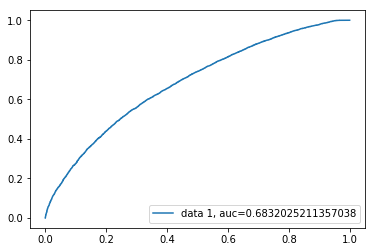

In [60]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Receiver Operator Characteristic(ROC) curve plots true positive rate against false positive rate
    # AUC score 1 means perfect classifier
    # AUC score 0.5 means bad classifier

y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_pred)
print('Confusion matrix:\n',cm)
print('Classification report: \n',classification_report(y_test,rf_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Confusion matrix:
 [[7941 2824]
 [5104 4180]]
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.74      0.67     10765
           1       0.60      0.45      0.51      9284

    accuracy                           0.60     20049
   macro avg       0.60      0.59      0.59     20049
weighted avg       0.60      0.60      0.60     20049



In [62]:
# predicting probabilities to calculate ROC AUC
rf_prob=rf.predict_proba(X_test)[:, 1]

# calculate ROC AUC using test prediction
roc_value = roc_auc_score(y_test, rf_prob)
print(roc_value)

0.6415916049927227


### XGBoost

In [ ]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [64]:
from xgboost import plot_importance

xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, xg_pred))
print("Classification Report: \n", classification_report(y_test,xg_pred))
print ("roc auc score:",roc_auc_score(y_test, xg_pred))

Confusion Matrix: 
 [[8170 2595]
 [4648 4636]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69     10765
           1       0.64      0.50      0.56      9284

    accuracy                           0.64     20049
   macro avg       0.64      0.63      0.63     20049
weighted avg       0.64      0.64      0.63     20049

roc auc score: 0.6291473696912597


In [65]:
from sklearn.feature_selection import SelectFromModel

thresh=0.0185

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy2 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy2)

n=14, Accuracy: 0.6250873704476965


In [66]:
thresh=0.018

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy3 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy3)

n=15, Accuracy: 0.6257820815739008


In [67]:
thresh=0.017

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy4 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy4)

n=15, Accuracy: 0.6257820815739008


In [68]:
thresh=0.016

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy5 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy5)

n=15, Accuracy: 0.6257820815739008


In [69]:
thresh=0.015

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy6 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy6)

n=18, Accuracy: 0.6251358084157793


In [70]:
thresh=0.01

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy7 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy7)

n=27, Accuracy: 0.6268928229159516


In [71]:
thresh=0.0001

# select features using threshold
selection = SelectFromModel(xg, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred_select_xg = selection_model.predict(select_X_test)
predictions_xg = [round(value) for value in y_pred_select_xg]
accuracy8 = roc_auc_score(y_test, predictions_xg)
print("n=%d, Accuracy:" % (select_X_train.shape[1]), accuracy8)

n=61, Accuracy: 0.6291473696912597


### Grid Search

In [73]:
# tuning max_depth and min_child_weight
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( n_estimators=150, objective= 'binary:logistic'), 
                        param_grid = param_test1, scoring='roc_auc', cv=skf )
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 5}, 0.6953581260806709)

In [74]:
# tuning gamma using best max_depth, min_child_weight, and n_estimators
param_test2 = {
 'gamma':[i/10.0 for i in range(0,3)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( n_estimators=150, max_depth=7, min_child_weight=5, 
                objective= 'binary:logistic'), param_grid = param_test2, scoring='roc_auc', cv=skf)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.6953581260806709)

In [75]:
# tuning subsample and colsample_bytree 
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( n_estimators=150, max_depth=7, 
                min_child_weight=5, gamma=0, objective= 'binary:logistic'),param_grid = param_test3, 
                        scoring='roc_auc', cv=skf)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.6968376552868627)

In [76]:
# tuning learning rate
param_test4 = { 
    'learning_rate':[0.05,0.1]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( n_estimators=150, max_depth=7, 
                min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6,
                objective= 'binary:logistic'),param_grid = param_test4, scoring='roc_auc',cv=skf)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

({'learning_rate': 0.1}, 0.6968376552868627)

In [77]:
# testing n_estimators=100 vs n_estimators=150
xg2 = XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=7,
                min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6, cv=skf)
xg2.fit(X_train, y_train)
y_pred_xg2 = xg2.predict(X_test)
roc_auc_score(y_test, y_pred_xg2)

0.6348206004146795

In [78]:
xg3 = XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=150, max_depth=7,
                min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6, cv=skf)
xg3.fit(X_train, y_train)
y_pred_xg3 = xg3.predict(X_test)
roc_auc_score(y_test, y_pred_xg3)

0.6397474851979534

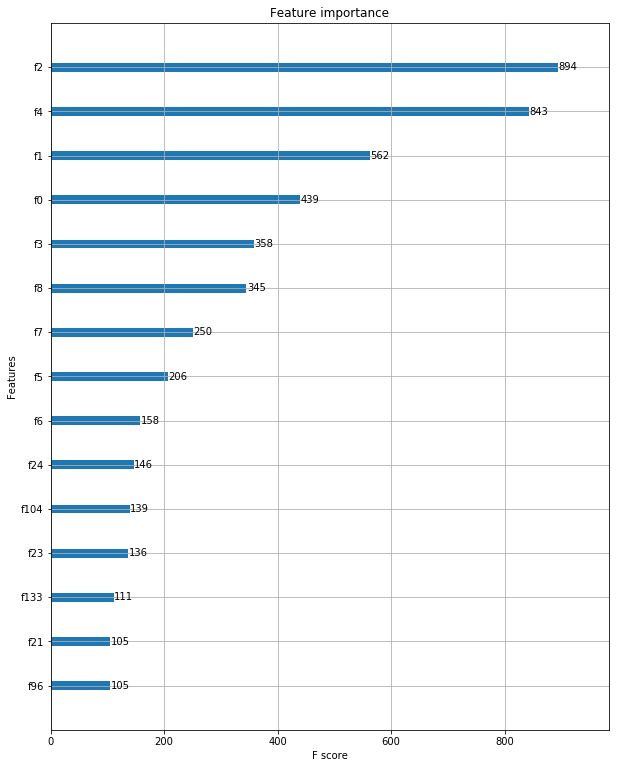

In [79]:
#using xg3 which has all the best parameters

ax = plot_importance(xg3, max_num_features=15)
ax.figure.set_size_inches(10,13)

In [81]:
# checking feature number with its column name
data.columns[2]

'num_lab_procedures'

In [82]:
feature_columns = data.drop('readmitted', axis=1)
print(len(feature_columns.columns))

135


In [83]:
feature_columns = list(feature_columns)

In [84]:
x_test = pd.DataFrame(X_test, columns = feature_columns)

In [85]:
x_test.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin',
       ...
       'discharge_23', 'discharge_24', 'discharge_25', 'discharge_27',
       'discharge_28', 'N/A', 'type1', 'type2', 'db_related_No',
       'db_related_Yes'],
      dtype='object', length=135)

In [87]:
# compare y_test and xgboost y_pred with X_test
y_predict = np.array(y_pred_xg3)
y_test = np.array(y_test)
df2 = pd.DataFrame({'y_predict': y_pred_xg3,'y_test': y_test}, columns= ['y_predict', 'y_test'])
final = pd.concat([df2, x_test], axis=1)

In [91]:
def prediction(row):
    return y_predict == y_test

final['correct_prediction'] = final.apply(lambda row: prediction(row), axis=0)

In [92]:
final

,y_predict,y_test,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,discharge_24,discharge_25,discharge_27,discharge_28,N/A,type1,type2,db_related_No,db_related_Yes,correct_prediction
0,0,0,8,1,42,0,7,1,0,0,...,0,0,0,0,1,0,0,1,0,True
1,0,0,7,2,38,2,16,0,0,0,...,0,0,0,0,1,0,0,0,1,True
2,1,0,7,1,20,2,22,0,1,3,...,0,0,0,0,0,0,1,1,0,False
3,0,1,6,1,41,2,9,0,0,1,...,0,0,0,0,1,0,0,0,1,False
4,0,0,7,5,41,3,5,0,0,0,...,0,0,0,0,1,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,0,1,6,7,75,6,32,0,0,0,...,0,0,0,0,0,1,0,0,1,False
20045,0,0,1,2,10,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,True
20046,0,1,4,4,50,0,7,0,0,0,...,0,0,0,0,1,0,0,0,1,False
20047,0,1,1,2,36,0,5,0,0,0,...,0,0,0,0,1,0,0,0,1,False


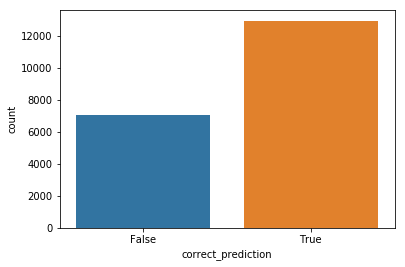

In [93]:
ax = sns.countplot(x="correct_prediction", data=final)

In [94]:
true_predictions = final.loc[final.correct_prediction == True]
false_predictions = final.loc[final.correct_prediction == False]

In [ ]:
## checking both true and false predictions .describe() to see if there are any significant differences in mean

In [95]:
true_predictions.describe()

,y_predict,y_test,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,N/A,type1,type2,db_related_No,db_related_Yes
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,...,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,0.393102,0.393102,7.072139,4.366330,43.098449,1.369030,16.182008,0.385387,0.227143,0.713834,...,0.004012,0.000386,0.009953,0.000154,0.001003,0.242342,0.303140,0.454517,0.444719,0.555281
std,0.488458,0.488458,1.567847,2.967034,19.836178,1.709494,8.234542,1.322467,1.197583,1.381190,...,0.063216,0.019638,0.099271,0.012422,0.031656,0.428517,0.459633,0.497946,0.496954,0.496954
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,8.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,10.000000,14.000000,120.000000,6.000000,75.000000,29.000000,76.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
false_predictions.describe()

,y_predict,y_test,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,N/A,type1,type2,db_related_No,db_related_Yes
count,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,...,7088.000000,7088.000000,7088.000000,7088.0,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000
mean,0.409001,0.590999,7.235327,4.446388,43.272997,1.300649,15.998307,0.348476,0.161823,0.510440,...,0.003668,0.000141,0.008465,0.0,0.001270,0.211343,0.298392,0.490265,0.458804,0.541196
std,0.491684,0.491684,1.513099,2.955042,19.789433,1.702028,7.805180,1.173965,0.824298,0.984086,...,0.060459,0.011878,0.091622,0.0,0.035613,0.408290,0.457585,0.499940,0.498335,0.498335
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,8.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,10.000000,14.000000,126.000000,6.000000,75.000000,35.000000,37.000000,16.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


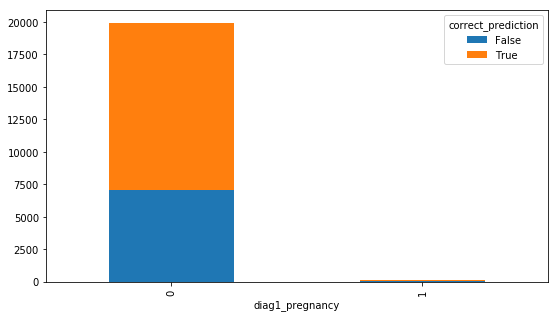

In [97]:
final.groupby(['diag1_pregnancy', 'correct_prediction']).size().unstack().plot(kind='bar',stacked=True, figsize=(9,5))
plt.show()

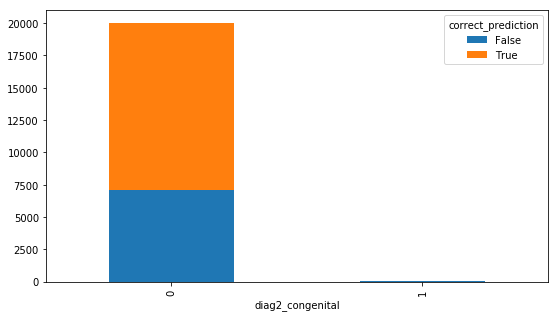

In [98]:
final.groupby(['diag2_congenital', 'correct_prediction']).size().unstack().plot(kind='bar',stacked=True, figsize=(9,5))
plt.show()

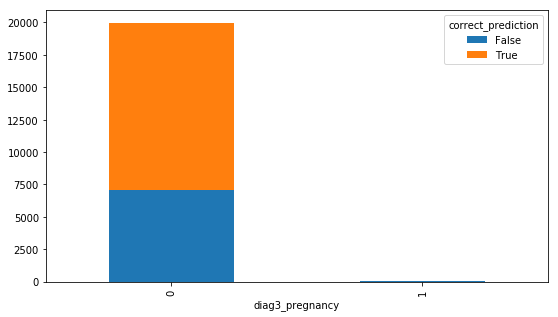

In [99]:
final.groupby(['diag3_pregnancy', 'correct_prediction']).size().unstack().plot(kind='bar',stacked=True, figsize=(9,5))
plt.show()

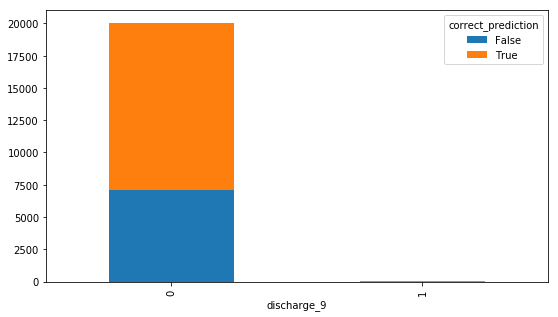

In [100]:
final.groupby(['discharge_9', 'correct_prediction']).size().unstack().plot(kind='bar',stacked=True, figsize=(9,5))
plt.show()